# L12a: Feed Forward Neural Networks (FNNs)

___

In this lecture, we introduce Feed Forward Neural Networks (FNNs), an artificial neural network structure where connections between layers of nodes do not form cycles. This differs from recurrent neural networks (RNNs), where data can flow in cycles (we'll look at recurrent networks next time). The key concepts discussed in this lecture are:

* __FNN Architecture__: Feedforward neural networks (FNNs) are foundational artificial neural network architectures in which information flows unidirectionally from input nodes through (potentially many) hidden layers of arbitrary dimension to output nodes without cycles or feedback loops. Each node in the network is a simple processing unit that applies a linear transformation followed by a (potentially) non-linear activation function to its inputs. 
* __FNN Applications__: FNNs are widely employed for pattern recognition, classification tasks (including for non-linearly separable data), and predictive modeling, such as identifying objects in images, sentiment analysis in text, or forecasting process trends. They also work well in structured data applications like medical diagnostics (classification of patient records) and marketing (personalized recommendations). FFNs also are components of more advanced architectures in fields like computer vision and natural language processing.
* __FNN Training__: FNNs are trained using supervised learning, where the model learns to map inputs to outputs by minimizing a loss function. The most common training algorithm [is backpropagation](https://en.wikipedia.org/wiki/Backpropagation), which uses [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) to update the weights (and bias values) of the network based on the error between predicted and actual outputs.

The source(s) for this lecture can be found here:
* [John Hertz, Anders Krogh, and Richard G. Palmer. 1991. Introduction to the theory of neural computation. Addison-Wesley Longman Publishing Co., Inc., USA.](https://dl.acm.org/doi/10.5555/104000)
* [Mehlig, B. (2021). Machine Learning with Neural Networks. Chapter 5: Perceptrons and Chapter 6: Stochastic Gradient Descent](https://arxiv.org/abs/1901.05639v4)

___

However, before we do anything, let's set up the computational environment, e.g., importing the necessary libraries (and codes) by including the `Include.jl` file.

In [3]:
include("Include.jl")

## Origin story: McCulloch-Pitts Neurons
In [their paper, McCulloch and Pitts (1943)](https://link.springer.com/article/10.1007/BF02478259) explored how the brain could produce highly complex patterns by using many [interconnected _basic cells (neurons)_](https://en.wikipedia.org/wiki/Biological_neuron_model). McCulloch and Pitts suggested a _highly simplified model_ of a neuron. Nevertheless, they made a foundational contribution to developing artificial neural networks that we find in wide use today. Let's look at the model of a neuron proposed by McCulloch and Pitts.

Suppose we have a neuron that takes an input vector $\mathbf{n}(t) = (n^{(t)}_1, n^{(t)}_2, \ldots, n^{(t)}_{m})$, where each component $n_k\in\mathbf{n}$ is a binary value (`0` or `1`) which represents the state of other predecessor neurons $n_1,n_2,\ldots,n_m$ at time $t$. Then, the state of our neuron (say neuron $k$) at time $t+1$ is given by:
$$
\begin{align*}
n_{k}(t+1) &= \sigma\left(\sum_{j=1}^{m} w_{kj} n_j(t) - \theta_k\right) \\
\end{align*}
$$
where $\sigma:\mathbb{R}^{n}\rightarrow\mathbb{R}$ is an _activation function_ that maps the weighted sum of a vector of inputs to a scalar (binary) output. In the original paper, the state of neuron $k$ at time $t+1$ denoted as $n_k(t+1)\in\{0,1\}$, where $w_{kj}$ is the weight of the connection between neuron $k$ to the output of (predecessor) neuron $k$, and $\theta_k$ is the threshold for neuron $k$. 
* _Activation function_: In this original McCulloch and Pitts model, the activation function $\sigma$ is a step function, which means that the output of the neuron is `1` if the weighted sum of inputs exceeds the threshold $\theta_k$, and `0` otherwise. In other words, the neuron "fires" (produces an output of `1`) if the total input to the neuron is greater than or equal to the threshold $\theta_k$. This is a binary output, simplifying real biological neurons that can produce continuous outputs.
* _Parameters_: The weights $w_{kj}\in\mathbb{R}$ and the threshold $\theta_k\in\mathbb{R}$ are parameters of the neuron that determine its behavior. The weights can be positive or negative, representing the strength and direction of the influence of the input neurons on the output neuron. The threshold determines how much input the neuron needs to "fire" (i.e., produce an output of `1`).

While the McCulloch-Pitts neuron model simplifies real biological neurons, it laid the groundwork for the development of more complex artificial neural networks. The key idea is that by combining many simple neurons in a network, we can create complex functions and learn to approximate any continuous function. This idea is at the heart of modern deep learning and neural networks. 

__Hmmmm__. These ideas _really_ seem familiar. Have we seen this before? Yes! the McCulloch-Pitts Neuron underpins [The Perceptron (Rosenblatt, 1957)](https://en.wikipedia.org/wiki/Perceptron), [Hopfield networks](https://en.wikipedia.org/wiki/Hopfield_network) and [Boltzmann machines](https://en.wikipedia.org/wiki/Boltzmann_machine). Wow!!

___

## Activation functions
The activation function $\sigma:\mathbb{R}\rightarrow\mathbb{R}$ of a neuron is a mathematical function that determines the output of the neuron based on its input. 

The activation function takes the weighted sum of the inputs to the neuron and applies a non-linear transformation to produce the output. The choice of activation function is important because it affects the learning process and the performance of the neural network. There is a [wide variety of activation functions](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions), each with its own characteristics and applications. 

Some common activation functions are:

* __Sigmoid function__: The sigmoid function is a smooth, S-shaped curve that maps input values to the range (0, 1). It is defined as:
$ \sigma(x) = \frac{1}{1 + e^{-x}}$. The sigmoid function is often used in the output layer of binary classification problems, as it can be interpreted as a probability. 
* __Hyperbolic tangent function (tanh)__: The $\texttt{tanh}$ function is similar to the sigmoid function but maps input values to the range (-1, 1). It is defined as: $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$. It is often used in hidden layers of neural networks.
* __Rectified Linear Unit (ReLU)__: The ReLU function is a piecewise linear function that outputs the input value if it is positive and zero otherwise. It is defined as: $\text{ReLU}(x) = \max(0, x)$. The $\texttt{ReLU}$ function helps mitigate the vanishing gradient problem, a complication in training, making it a popular choice for hidden layers in deep networks. However, it can suffer from [the dying ReLU problem](https://arxiv.org/abs/1903.06733), where neurons can become inactive and stop learning if they output zero for all inputs.
* __Softmax function__: The $\texttt{softmax}$ function is often used in the output layer of multi-class classification problems. It converts a vector of raw scores (logits) into a probability distribution over multiple classes. It is defined as: $\texttt{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$ where $z_i$ is the raw score for class $i$, and $K$ is the total number of classes. The softmax function ensures that the output probabilities sum to 1, making it suitable for multi-class classification tasks.

Let's take a look at the [activation functions exported by the `NNlib.jl` package](https://fluxml.ai/NNlib.jl/dev/).

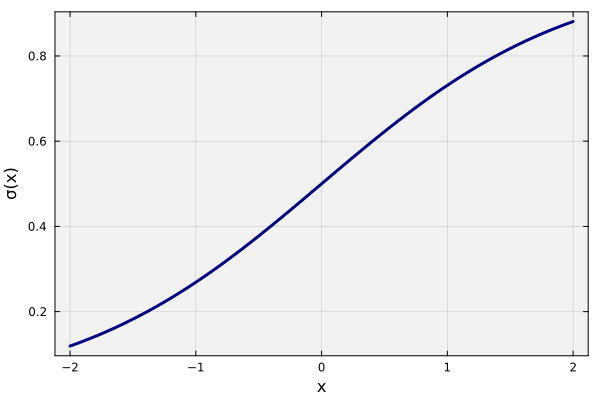

In [37]:
let

    # initialize -
    x = range(-2, 2, length=100) |> collect .|> Float32; # notice: .|> Float32. What?

    # what activation function to use? We'll use the NNlib package for this.
    y = x |> NNlib.sigmoid_fast |> collect; # 

    # plot -
    p = plot(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent); 
    plot!(x, y, xlabel="x", ylabel="σ(x)", legend=:topright, label="", lw=3, c=:navy)
end

___

<img
  src="figs/nn-4.svg"
  alt="triangle with all three sides equal"
  height="400"
  width="800" />

## Feedforward Neural Networks
Let's consider the simple network shown above. The network has three(ish) layers: an input layer (five nodes), a hidden layer (12 nodes), and an output layer (three nodes). 

* __Hidden Layer__: The hidden layer performs computations on the input data. Each node in the hidden layer takes the input vector $\mathbf{x}$ and applies a linear transformation followed by a non-linear activation function. The output of each node in the hidden layer is then passed to the next layer (in this case, the output layer). The number of nodes in the hidden layer can vary depending on the complexity of the task. Furthermore, the hidden layer can have multiple layers (i.e., deep neural networks) to learn more complex data representations. The example network has a single hidden layer with 12 nodes.
* __Output Layer__: The output layer is the final layer of the network that produces the output of the network $\mathbf{y} = \left\{y_{1},y_{2},\dots,y_{k}\right\}$ where $\mathbf{y}\in\mathbb{R}^{k}$. Each node in the output layer takes the output from the hidden layer and applies a linear transformation followed by a non-linear activation function. In this example, we have three output nodes. For instance, we could predict three classes in a multiclass classification task. In this case, the network output can be interpreted as probabilities for each class, and we can use techniques like softmax to convert the output into probabilities.

Let's generalize this example to a more formal definition of a feedforward neural network.

### Function Composition
Suppose we have a feedforward neural network with $L$ layers. The network has $n$ input nodes (we'll call this layer 0), and $i=1,2,\dots, L-1$ hidden layers where each hidden layer has $m_{i}$ nodes, and the output (layer $L$) has $d_{out}$ output nodes.  Each hidden layer is fully connected to the previous and subsequent layers (but there are no connections between the nodes inside a layer and no self-connections). Information flows from the input to the output layer, forming a feedforward structure.

Let's dig into the states and parameters of the network.

* __Inputs and outputs__: Let $\mathbf{x} = \left\{x_{1},x_{2},\dots,x_{d_{in}},1\right\}$ be the _augmented_ input vector, where $x_{i}\in\mathbb{R}$ is the $i$-th feature of the input vector. The dimension of the _augmented_ input vector is $d_{in} + 1$, where $d_{in}$ is the number of features in the input vector. The extra `1` is added to the input vector to allow us to include the bias term in the weight vector. This is a common technique used in machine learning to simplify the representation of the model. Further, let $\mathbf{z}_{i} = \left\{z^{(i)}_{1},z^{(i)}_{2},\dots,z^{(i)}_{m_{i}}\right\}$ be the output vector of the $i$-th hidden layer, where $z^{(i)}_{j}\in\mathbb{R}$ is the $j$-th component of the output of layer $i$. Finally, let $\mathbf{y}= \left\{y_{1},y_{2},\dots,y_{d_{out}}\right\}$ be the output vector, where $y_{k}\in\mathbb{R}$ is the $k$-th component of the output of the network.

* __Parameters__: Each node $j=1,2,\dots,m_{i}$ in layer $j\geq{1}$ has a parameter vector $\mathbf{w}^{(i)}_{j} = \left(w^{(i)}_{j,1},w^{(i)}_{j,2},\dots,w^{(i)}_{j,m_{i-1}}, b^{(i)}_{j}\right)$, where $w^{(i)}_{j,k}\in\mathbb{R}$ is the weight of the $k$-th input to node $j$ in layer $i$, and $b^{(i)}_{j}\in\mathbb{R}$ is the bias term for node $j$ in layer $i$. The weight vector $\mathbf{w}^{(i)}_{j}$ represents the strength of the connection between node $j$ in layer $i$ and all nodes in layer $i-1$. The bias term $b_{i}$ allows the model to shift the activation function to the left or right.

This may seem confusing, so let's think about this differently. A feedforward neural network can be considered a series of function compositions. For example, consider layer $1$ with $m_{1}$ nodes. The output of layer $1$ (given the input vector $\mathbf{z}_{\circ}$) is given by:

$$
\begin{align*}
\mathbf{z}^{(1)} &= \begin{bmatrix}
\sigma_{1}\left(\mathbf{z}_{\circ}^{\top}\cdot\mathbf{w}^{(1)}_{1}\right) \\
\sigma_{1}\left(\mathbf{z}_{\circ}^{\top}\cdot\mathbf{w}^{(1)}_{2}\right) \\
\vdots \\
\sigma_{1}\left(\mathbf{z}_{\circ}^{\top}\cdot\mathbf{w}^{(1)}_{m_{1}}\right)
\end{bmatrix}
\end{align*}
$$
where $\mathbf{w}^{(1)}_{j}$ is the weight vector for node $j$ in layer $1$, and $\sigma_{1}$ is the activation function for layer $1$ (assumed to be the same for nodes in layer $1$). The output of layer $1$ is a vector $\mathbf{z}^{(1)}\in\mathbb{R}^{m_{1}}$ which is then passed to layer $2$, which has $m_{2}$ nodes:
$$
\begin{align*}
\mathbf{z}^{(2)} &= \begin{bmatrix}
\sigma_{2}\left(\mathbf{z}_{1}^{\top}\cdot\mathbf{w}^{(2)}_{1}\right) \\
\sigma_{2}\left(\mathbf{z}_{1}^{\top}\cdot\mathbf{w}^{(2)}_{2}\right) \\
\vdots \\
\sigma_{2}\left(\mathbf{z}_{1}^{\top}\cdot\mathbf{w}^{(2)}_{m_{2}}\right)
\end{bmatrix}
\end{align*}
$$
where $\mathbf{w}^{(2)}_{j}$ is the weight vector for node $j$ in layer $2$, and $\sigma_{2}$ is the activation function for layer $2$ (assumed to be the same for nodes in layer $2$). However, we can also think of the output of layer $2$ as: $\mathbf{z}^{(2)} = \sigma_{2}\circ\sigma_{1}\left(\mathbf{z}_{\circ}\right)$, where $\sigma_{2}\circ\sigma_{1}$ is the composition of the two activation functions, i.e., $\mathbf{z}^{(2)} = \sigma_{2}\left(\sigma_{1}\left(\mathbf{z}_{\circ}\right)\right)$. Putting these ideas together, gives a nice way to think about a feedforward neural network: a series of function compositions:
$$
\begin{align*}
\hat{\mathbf{y}} &= f_{\theta}(\mathbf{x}) = \sigma_{L}\circ\sigma_{L-1}\circ\dots\circ\sigma_{1}\left(\mathbf{x}\right)
\end{align*}
$$
where $\sigma_{L}$ is the activation function for the output layer, $\mathbf{x}$ is the _augmented_ input vector, and $\hat{\mathbf{y}}\in\mathbb{R}^{d_{out}}$ is the output of the network. The function $f_{\theta}(\mathbf{x})$ represents the mapping from the input vector $\mathbf{x}=\mathbf{z}_{\circ}$ to the output vector $\hat{\mathbf{y}}$, and $\theta$ represents the parameters of the network (i.e., the weights and biases). 

__Wow!__ A feedforward neural network $f_{\theta}:\mathbb{R}^{d_{in}}\rightarrow\mathbb{R}^{d_{out}}$ is just _some complicated function_ that takes an input vector $\mathbf{x}$ and produces an output vector $\hat{\mathbf{y}}$. Thus, we can do everything we do with functions: compose them, take their derivatives, and so on. This is a compelling idea because it allows us to use all the tools of calculus and linear algebra to analyze and optimize neural networks.

### Parameterization
Before we move on, let's take a moment to think about the parameters of the network. The parameters of the network are the weights and biases of each node. Each layer $i$ has $m_{i}$ nodes, and each node in layer $i$ has a _weight vector_ $\mathbf{w}^{(i)}_{j} = \left(w^{(i)}_{j,1},w^{(i)}_{j,2},\dots,w^{(i)}_{j,m_{i-1}}, b^{(i)}_{j}\right)$, where $w^{(i)}_{j,k}\in\mathbb{R}$ is the weight of the $k$-th input to node $j$ in layer $i$, and $b^{(i)}_{j}\in\mathbb{R}$ is the bias term for node $j$ in layer $i$. 

We represent the parameters of _each_ layer $i$ in the matrix $\mathbf{W}_{i}\in\mathbb{R}^{m_{i}\times(m_{i-1}+1)}$. The weight matrix $\mathbf{W}_{i}$ contains the weights and biases for all nodes in layer $i$. Thus, we can pack all the parameters $\left(\mathbf{W}_{1},\mathbf{W}_{2},\dots,\mathbf{W}_{L}\right)$ into the $\theta$ vector:
$$
\begin{align*}
\theta &\equiv  \left(w^{(1)}_{1,1},w^{(1)}_{1,2},\dots,w^{(1)}_{1,m_{0}}, b^{(1)}_{1}, w^{(1)}_{2,1},w^{(1)}_{2,2},\dots,w^{(1)}_{2,m_{0}}, b^{(1)}_{2}, \ldots, w^{(L)}_{k,1},w^{(L)}_{k,2},\dots,w^{(L)}_{k,m_{L-1}}, b^{(L)}_{k}\right)
\end{align*}
$$
where $k=1,2,\dots,d_{out}$ is the index of the output node. 

#### How big is $\theta$?
The number of parameters in a feedforward neural network depends on the number of layers and nodes in each layer. Suppose we have a feedforward neural network with $L$ layers, where the $i$-th layer has $m_{i}$ nodes. The number of parameters in the network is given by:
$$
\begin{align*}
\text{Number of parameters} &= \sum_{i=1}^{L} m_{i}\left(m_{i-1}+1\right) \\
&= \sum_{i=1}^{L} \left(m_{i} m_{i-1} + m_{i}\right) \\
&= \underbrace{\sum_{i=1}^{L} m_{i} m_{i-1}}_{\text{weights}} + \underbrace{\sum_{i=1}^{L} m_{i}}_{\text{bias terms}} \quad \blacksquare \\
\end{align*}
$$
where $m_{0}$ is the number of input nodes, and $m_{L}$ is the number of output nodes. The first term counts the number of weight parameters in the network, while the second term counts the number of biases in the network.

___

### Example
Let's do a simple example to illustrate the concepts we've discussed. This network won't win any prizes or do anything useful, but it will help us understand the basic concepts of feedforward neural networks.

Start by specifying the input to the network in the `x::Array{Float64}` variable. 
* The input to the network is a vector of binary or continuous-valued features representing the data we want to process. Each component of the input vector corresponds to a feature of the data. For example, in an image classification task, the input vector could represent the pixel values of an image. 

In [41]:
x = range(-2, 2, length=11) |> collect .|> Float32 # notice: .|> Float32. What?

11-element Vector{Float32}:
 -2.0
 -1.6
 -1.2
 -0.8
 -0.4
  0.0
  0.4
  0.8
  1.2
  1.6
  2.0

Next, let's consider the processing in a single network layer. For example, suppose we have an input dimension of $d_{in} = 11$ and a hidden layer with $m_{1} = 21$ nodes. We'll pick some activation function (e.g., the sigmoid or relu function [from the `NNlib.jl` package](https://fluxml.ai/NNlib.jl/dev/)) and then compute the output of the hidden layer.
* _What activation function should we use?_ The choice of activation function is important because it affects the learning process and the neural network's performance. There are various activation functions, each with its own characteristics and applications. We can make this design choice when we build the network. 
* _What should the weights and biases be?_ The weights and biases are the network parameters we will learn during training. Let's pick some random values for the weights and biases for now. This gets us started, and we can refine the values later. When we build [a `MyLayerModel` instance](src/Types.jl) these parameters will be initialized to random values.

In [47]:
z, testmodel = let

    # let's build a simple neural network with some hidden layers
    n = length(x); # number of inputs (zₒ)
    m = 21; # number of hidden neurons

    # build  model -
    model = build(MyLayerModel, (
        n = n, # number of inputs
        m = m, # number of hidden neurons
        σ = NNlib.relu, # activation function (pick one from NNlib)
    ));

    # evaluate this layer
    z = model(x); # evaluate the model with this input

    # return -
    z, model
end;

In [49]:
z

21-element Vector{Float64}:
 0.5852189092954473
 0.3487020580999918
 0.0
 0.14203364390344145
 0.9016406935543316
 0.37701185869057846
 0.7335371510975494
 0.07339924604076373
 0.09597524706063207
 0.16028580806600037
 0.14290996884118481
 0.5781189264724963
 0.03623396819358016
 0.0687302813552244
 0.0
 0.19603097562654226
 0.0
 0.10268975314844708
 0.0
 0.2735201241484355
 0.35343646192211936

That's sort of interesting! Let's see what multiple layers look like (and how we can construct such a creature with our simple codebase).

In [51]:
Z, models = let

    # initialize -
    L = 3; # How many layers do we want?
    σ = [NNlib.tanh_fast, NNlib.relu, NNlib.sigmoid]; # activation function (pick one from NNlib)
    n = length(x); # number of inputs (zₒ)

    # Dimensions of each layer -
    m = Dict{Int, Int}();
    m[0] = n; # dimension of the inputs (zₒ) (including the bias at the end)
    for i in 1:(L-1)
        m[i] = 2*m[0]; # number of hidden neurons, make this some mutiple of the input size
    end
    m[L] = 1; # number of outputs (zₗ)

    # build models dictionary -
    models = Dict{Int, MyLayerModel}();
    for i in 1:L
        
        models[i] = build(MyLayerModel, (
            n = m[i-1], # number of inputs
            m = m[i], # number of hidden neurons
            σ = σ[i], # activation function (pick one from NNlib)
        ));
    end;
    
    # compute the output of each layer -
    z = Dict{Int, Array{Float32}}();
    z[0] = x;
    for i in 1:L
        z[i] = models[i](z[i-1]); # evaluate the layer
    end

    z, models; # return the output of each layer 
end;

In [63]:
Z[3]

1-element Vector{Float32}:
 0.47224638

__Check__: Is our parameter count correct? Let's check this by hand and then compare it to the code. We'll hardcode the values of the various dimensions of the network in the example above; if you change them, you'll need to change the calculation below.
* __Input layer__: $d_{in} = 11$ (11 input nodes)
* __Hidden layer 1__: $m_{1} = 22$ (22 hidden nodes)
* __Hidden layer 2__: $m_{2} = 22$ (22 hidden nodes)
* __Output layer__: $d_{out} = 1$ (1 output node)

which gives the following total number of parameters:

$$
\begin{align*}
\text{Number of parameters} &= \sum_{i=1}^{L} m_{i}\left(m_{i-1}+1\right) \\
&= \sum_{i=1}^{L} m_{i} m_{i-1} + \sum_{i=1}^{L} m_{i} \\
& = m_{0} m_{1} + m_{1} m_{2} + m_{2}m_{3} + m_{1}+m_{2} + m_{3} \\
& = \left(m_{0}+1\right) \cdot m_{1} + \left(m_{1}+1\right) \cdot m_{2} + \left(m_{2}+1\right) \cdot m_{3} \\
&= \left(11+1\right) \cdot 22 + \left(22+1\right) \cdot 22 + \left(22+1\right) \cdot 1 \\
&= 12 \cdot 22 + 23 \cdot 22 + 23 \cdot 1 \\
&= 264 + 506 + 23 \\
&= 793\quad \blacksquare \\
\end{align*}
$$
Let's check this with our code. We'll count the parameters in each layer and then sum them up.

In [17]:
total_number_of_parameters = let
    
    # initialize -
    L = 3; # How many layers do we want?

    total_number_of_parameters = 0;
    for i in 1:L
        
        # get the model
        model = models[i];

        # get the number of parameters
        mᵢ = size(model.W, 1); # number of hidden neurons (rows)
        nᵢ = size(model.W, 2); # number of inputs (columns)

        # add to the total
        total_number_of_parameters += (nᵢ*mᵢ);
    end

    total_number_of_parameters;
end;

In [18]:
@assert total_number_of_parameters == 793 # check the number of parameters. Incorrect? Then ... boooom!

__Wow!__ That is a lot of parameters! This is a simple network, but it has a lot of parameters. This is one of the reasons why neural networks are so powerful: they can learn very complex functions by adjusting the weights and biases of the network. However, this also means they can be prone to overfitting, especially if we have a small amount of training data.

Speaking of training, let's look at how we can train this network to learn the model's parameters.

___

## Training
Suppose have a training dataset $\mathcal{D} = \left\{(\mathbf{x}_{1},y_{1}),\dotsc,(\mathbf{x}_{n},y_{n})\right\}$ with $n$ examples, where 
$\mathbf{x}_{i}\in\mathbb{R}^{m}$ is the $i$-th feature vector, and $y_{i}\in\mathbb{R}$ is the corresponding output. The output can be a discrete label (e.g., in classification tasks) where each example has been labeled by an expert, i.e., a human to be in a category $y_{i}\in\{-1,1\}$, or is some continuous value $y_{i}\in\mathbb{R}$, e.g., a real-valued measurement such as temperature, pressure, etc, for regression tasks. 

Classically, the training of feedforward neural networks is done [using the _backpropagation_ algorithm](https://en.wikipedia.org/wiki/Backpropagation), a common _supervised learning_ algorithm based on gradient descent. 
* _Do we have to use Gradient descent to train a neural network?_ No! Theoretically, other optimization algorithms like genetic algorithms, particle swarm optimization, and simulated annealing could also be used. However, gradient descent is the most common due to rigid orthodoxy (hot take) and some interesting technical features.

Backpropagation computes the gradient for training multi-layer neural networks using gradient descent. It is a supervised learning method applying the chain rule of calculus to evaluate the gradient of the loss function concerning network weights and biases. The algorithm involves two steps:   
1. **Forward Pass**: Calculate the network's output for an input by passing it through each layer and applying the activation function at every node, yielding an output vector $\hat{\mathbf{y}}$ for the input $\mathbf{x}$.  
2. **Backward Pass**: Determine the gradient of the loss function, which measures the difference between the actual output $\mathbf{y}$ and predicted output $\hat{\mathbf{y}}$, by propagating the error backward using the chain rule.

### Forward Pass
__Initialization__: Initialize the weights and biases of the network randomly or using some heuristic method. Let $\mathbf{z}_{\circ}^{\top} = \left(x_{1},x_{2},\dots,x_{n}, 1\right)$ be the _augmented input vector_, where the last component is a constant `1` that allows us to include the bias term in the weight vector. 

For each layer $i=1,2,\dots,L$ of the network:
1. For each node $j=1,2,\dots,m_{i}$ in layer $i$:
      1. Compute the input to the activation function: $a_{j} = \mathbf{z}_{i-1}^{\top}\cdot{\mathbf{w}^{(i)}_{j}}$, where $\mathbf{w}^{(i)}_{j}$ is the parameter vector (weights and bias) for node $j$ in layer $i$, and $\mathbf{z}^{\top}_{i-1}$ is the transpose of the output vector from the previous layer, i.e., the inpt to layer $i$ is the output of layer $i-1$. 
      2. Compute the output of the activation function: $z_{j} = \sigma_{i}(a_{j})$, where $\sigma:\mathbb{R}\rightarrow\mathbb{R}$ denotes the activation function for layer $i$, and $a_{j}$ denotes the input to the activation function. The activation function can be a $\texttt{sigmoid}$, $\texttt{tanh}$, $\texttt{ReLU}$, or any other non-linear function that introduces non-linearity into the model. 
2. Store the output of each node in the vector $\mathbf{z}_{i} = \left\{z_{1},z_{2},\dots,z_{m_{i}}\right\}$, where $z_{j}\in\mathbb{R}$ is the $j$-th component of the output of layer $i$.
4. The output of the last layer is the final model predicted output from the network: $\hat{\mathbf{y}} = \mathbf{z}_{L}$.

end

### Backward Pass (Gradient Descent)
The backward pass computes the gradient of a _loss function_ with respect to each weight and bias in the network by propagating the error backward through the network using the chain rule.
* _What is a loss function_? Suppose we have a function $\mathcal{L}(\mathbf{y},f_{\theta}(\mathbf{x}))$ that measures the difference between the actual output $\mathbf{y}$ and the model predicted output $\hat{\mathbf{y}} = f_{\theta}(\mathbf{x})$. The loss is _big_ when the predicted output is far from the actual output and _small_ when the predicted output is close to the actual output. The loss function can be considered a measure of how well the model performs on the training data. The goal of training is to minimize this loss function by adjusting the weights and biases of the network.
* _What loss function do we use?_ The loss function depends upon the task we are trying to do. For example, the loss can be the mean squared error (MSE) for regression tasks, or [cross-entropy loss for classification tasks](https://en.wikipedia.org/wiki/Cross-entropy), negative log-likelihood for either classification and regression, etc.

We assume $\mathcal{L}(\mathbf{y},f_{\theta}(\mathbf{x}))$ is _at least once differentiable_ with respect to the parameters, i.e., we can compute the gradient $\nabla_{\theta}{\mathcal{L}}(\cdot)$. The gradient points in the direction of the steepest increase of the function. Thus, we can iteratively update the parameters to minimize the objective function using the update rule:
$$
\begin{equation*}
\theta_{k+1} = \theta_{k} - \alpha(k)\cdot\nabla_{\theta}\mathcal{L}(\theta_{k})\quad\text{where}{~k = 0,1,2,\dots}
\end{equation*}
$$
where $k$ denotes the iteration index, and $\nabla_{\theta}\mathcal{L}(\cdot)$ is the gradient of the loss function with respect to the parameters $\theta$. 
* _What is $\alpha(k)$?_ The (hyper) parameter $\alpha(k)>0$ is the _learning rate_ which can be a function of the iteration count $k$. This is a user-adjustable parameter, and we'll assume it's constant for today.
* _Stopping?_ Gradient descent will continue to iterate until a stopping criterion is met, i.e., $\lVert\theta_{k+1} - \theta_{k}\rVert\leq\epsilon$ or the maximum number of iterations is reached, or some other stopping criterion is met, i.e., the gradient is small at the current iteration $\lVert\nabla_{\theta}\mathcal{L}(\theta_{k})\rVert\leq\epsilon$.

Pusedocode for a naive gradient descent algorithm (for a fixed learning rate) is shown in [the week-3 lecture notes](https://github.com/varnerlab/CHEME-5820-Lectures-Spring-2025/blob/main/lectures/week-3/L3c/docs/Notes.pdf). 

### Stochastic Gradient Descent
Computing the full gradient can be expensive. Stochastic Gradient Descent (SGD) is a less expensive approximation to full gradient descent. Suppose we let $\mathcal{L}(\theta)$ denote the overall objective function computed over all $n$ of the training examples. Then, the loss function could be written as:
$$
\begin{align*}
\mathcal{L}(\theta) &= \frac{1}{n}\sum_{i=1}^{n}\mathcal{L}_{i}(\theta)
\end{align*}
$$
where $\mathcal{L}_{i}(\theta)$ denote the loss on the $i$-th training example. The parameter update rule for training dataset $\mathcal{D}$ is then given by:
$$
\begin{align*}
\theta_{k+1} = \theta_{k} - \frac{\alpha(k)}{n}\cdot\sum_{i\in\mathcal{D}}\nabla_{\theta}\mathcal{L}_{i}(\theta_{k})\quad\text{where}{~k = 0,1,2,\dots}
\end{align*}
$$
In _stochastic gradient descent_ (SGD), we _approximate_ the full gradient using only a _single_ training example $\mathcal{L}_{i}(\theta)$, i.e., we randomly sample a single training example from the dataset $\mathcal{D}$ at each iteration. The parameter update rule for SGD is:
$$
\begin{align*}
\theta \gets \theta - \frac{\alpha}{n}\cdot\nabla_{\theta}\mathcal{L}_{i}(\theta)
\end{align*}
$$
where $i$ is a randomly selected training example from the dataset $\mathcal{D}$. The basic SGD algorithm is something like:

__Initialize__: Choose an initial value for parameters $\theta$ and a learning rate (function) $\alpha$.

While _not_ converged:
1. Randomly shuffle the order of the training data
1. For $i = 1,2,\dots,n$ do:
    1. Compute the update: $\theta \gets \theta - \alpha\cdot\nabla_{\theta}\mathcal{L}_{i}(\theta)$
1. Check for convergence: $\lVert \theta^{\prime} - \theta \rVert_{2}^{2}\leq\epsilon$ then converged.
2. If not converged, update the learning rate $\alpha$.

We can also use _mini-batch_ gradient descent, where we randomly sample a small batch of training examples (say $b$) at each iteration. The parameter update rule for mini-batch gradient descent is:
$$
\begin{align*}
\theta \gets \theta - \frac{\alpha}{b}\cdot\sum_{i=1}^{b}\nabla_{\theta}\mathcal{L}_{i}(\theta)
\end{align*}
$$
where $b$ is the size of the mini-batch, and the mini-batch size is a hyperparameter that can be tuned to improve performance.
* _What is the mini-batch size?_ The mini-batch size is a hyperparameter that can be tuned to improve performance. A small mini-batch size can lead to faster convergence, while a larger one can lead to more stable convergence (but may be slower). The choice of mini-batch size depends on the specific problem and the available computational resources.

The computation of the gradient $\nabla_{\theta}\mathcal{L}_{i}(\theta)$ is made much easier [using techniques such as Automatic differentiation](https://arxiv.org/abs/1502.05767).

## Strengths and Weaknesses of FNNs
Using feedforward neural networks (FNNs) for machine learning tasks has several advantages and disadvantages. Here are some of the key points to consider:

### Strengths
* _Universal approximation theorem_: [FNNs are universal approximators](https://en.wikipedia.org/wiki/Universal_approximation_theorem), meaning they can approximate any continuous function to arbitrary precision, given enough hidden units and training data. This makes them very powerful for a wide range of tasks.
* _Flexibility_: FNNs can be used for various tasks, including classification, regression, and generative modeling. They can also be adapted to work with different data types, such as images, text, and time series. 
* _Non-linearity_: Using non-linear activation functions, FNNs can learn complex non-linear relationships between inputs and outputs. This allows them to model complex patterns in the data that linear models cannot capture. They can also be used with various data sources, including images, text, and time series data. This allows them to explore non-linearly separable datasets. 

### Weaknesses
* _Overfitting_: FNNs can easily overfit the training data, especially when the model is too complex or the training data is limited. This can lead to poor generalization to new data. Regularization techniques such as dropout, L1/L2 regularization, and early stopping can help mitigate this issue.
* _Computationally expensive_: Training FNNs can be computationally expensive, especially for large datasets or deep networks. This can require significant computational resources and time. However, this is less of a concern with modern hardware and software frameworks, but these techniques require (for the most part) expert-level knowledge to implement efficiently.
* _Interpretability_: FNNs are often considered `black box` models, meaning it can be difficult to interpret how they make predictions. This can be a disadvantage in applications where interpretability is essential, such as healthcare or finance. However, there are techniques [such as LIME](https://arxiv.org/abs/1602.04938) and [SHAP](https://arxiv.org/abs/1705.07874) that can help improve the interpretability of FNNs.

## Lab
In Lab `L12b`, we will implement (and train) a feed-forward model for a simple computer vision task. 
* _Cool, what is this task?_ We'll give handwritten digits to the model and ask it to classify them. The model will be a _deep_ feedforward neural network (a network with potentially many hidden layers). We'll use [the MNIST handwritten image dataset](https://en.wikipedia.org/wiki/MNIST_database), which contains 60,000 images of handwritten digits (0-9). The goal is to train the model to recognize these digits based on the pixel values of the images.

# Today?
That's a wrap! What are some of the interesting things we discussed today?